In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn import metrics, datasets, preprocessing, model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_excel("Iris.xls")
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df["iris"]=le.fit_transform(df["iris"])
df

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
x=df.loc[:,["sepal length","sepal width","petal length","petal width"]]
y=df["iris"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [4]:
def fit_predict(x_train,y_train,x_test):
    ydf=pd.concat([x_train,y_train], axis=1)
    küme=[]
    for i in range(y_train.values.max()+1):
        küme.append(ydf[ydf.iloc[:,(len(ydf.columns)-1):len(ydf.columns)].values ==i])
        küme[i]=küme[i].drop(ydf.iloc[:,(len(ydf.columns)-1):len(ydf.columns)],axis=1)
    dk_küme=[]
    for j in range(y_train.values.max()+1):
        for i in range(len(x_train.columns)):
            dk_küme.append(math.sqrt((math.sqrt((x_train.iloc[:,i:i+1].values.mean()**2))-math.sqrt((küme[j].iloc[:,i:i+1].values.mean())**2))**2))
    array_k=np.array(dk_küme)
    array_k=array_k.reshape(y_train.values.max()+1,len(x_train.columns))
    dk_ytrain=np.zeros((y_train.values.max()+1,len(x_train.columns)))
    for j in range(y_train.values.max()+1):
        for i in range(len(x_train.columns)):
            dk_ytrain[j,i]=(array_k[j,i])/((x_train.iloc[:,i:i+1].values.max())-(x_train.iloc[:,i:i+1].values.min()))
    timeb=[]
    for j in range(y_train.values.max()+1):
        for i in range(len(x_train.columns)):
            timeb.append(math.sqrt((küme[j].iloc[:,i:i+1].values.mean())**2))
    timeb=np.array(timeb)
    timeb=timeb.reshape((y_train.values.max()+1),len(x_train.columns))
    v_uzak=[]
    sonuc=[]
    toplamP=0    
    for j in range(len(x_test.count(1))):
        for i in range(len(x_train.columns)):
            for k in range(y_train.values.max()+1):
                v_uzak.append((math.sqrt((math.sqrt(x_test.iloc[j:(j+1),i:(i+1)].values**2)-timeb[k,i])**2)))
    v2_uzak=[]
    v_uzak=np.array(v_uzak)
    v_uzak=v_uzak.reshape(int(len(v_uzak)/(y_train.values.max()+1)),(y_train.values.max()+1))
    for i in range(int(len(v_uzak)/len(x_train.columns))):
        for j in range(len(x_train.columns)):
            for d in range(y_train.values.max()+1):
                for k in range(y_train.values.max()+1):
                    if v_uzak[j+(i*len(x_train.columns)),d]>v_uzak[j+(i*len(x_train.columns)),k]:
                        toplamP=toplamP+((v_uzak[j+(i*len(x_train.columns)),d]/v_uzak[j+(i*len(x_train.columns)),k]))
                    if v_uzak[j+(i*len(x_train.columns)),d]<v_uzak[j+(i*len(x_train.columns)),k]:
                        toplamP=toplamP-((v_uzak[j+(i*len(x_train.columns)),d]/v_uzak[j+(i*len(x_train.columns)),k]))
                    if v_uzak[j+(i*len(x_train.columns)),d]==v_uzak[j+(i*len(x_train.columns)),k]:
                        toplamP=toplamP +0
                v2_uzak.append(toplamP*(dk_ytrain[d,j]))
                toplamP=0
    v2_uzak=np.array(v2_uzak)
    v2_uzak=v2_uzak.reshape(int(len(v2_uzak)/(y_train.values.max()+1)),(y_train.values.max()+1))
    vtoplam=0
    for j in range(int(len(v2_uzak)/len(x_train.columns))):
        for i in range(y_train.values.max()+1):
            for k in range(len(x_train.columns)):
                vtoplam+=v2_uzak[k+(j*len(x_train.columns)),i]
            sonuc.append(vtoplam)
            vtoplam=0
    sonuc=np.array(sonuc)
    sonuc=sonuc.reshape(int(len(sonuc)/(y_train.values.max()+1)),y_train.values.max()+1)
    prdcdf=pd.DataFrame(data=sonuc)
    tahmin=[]
    for j in range(prdcdf[0].count()):
        for i in range(len(prdcdf.columns)):
            if prdcdf.iloc[j:j+1,i:i+1].values==prdcdf.iloc[j:j+1,:].values.min():
                tahmin.append(i)
    tahmin=pd.DataFrame(data=tahmin)
    return tahmin

In [5]:
ydf=pd.concat([x_train,y_train], axis=1)
küme=[]
for i in range(y_train.values.max()+1):
    küme.append(ydf[ydf.iloc[:,(len(ydf.columns)-1):len(ydf.columns)].values ==i])
    küme[i]=küme[i].drop(ydf.iloc[:,(len(ydf.columns)-1):len(ydf.columns)],axis=1)
dk_küme=[]
for j in range(y_train.values.max()+1):
    for i in range(len(x_train.columns)):
        dk_küme.append(abs((abs((x_train.iloc[:,i:i+1].values.mean()))-abs((küme[j].iloc[:,i:i+1].values.mean())))))
array_k=np.array(dk_küme)
array_k=array_k.reshape(y_train.values.max()+1,len(x_train.columns))

In [11]:
dk_küme

[0.8783410138248833,
 0.35652841781874045,
 2.403686635944701,
 0.9929339477726575,
 0.019305019305019933,
 0.2804375804375807,
 0.33938223938223944,
 0.06460746460746436,
 0.7166023166023168,
 0.018275418275418787,
 1.6745173745173747,
 0.7673101673101668]

In [12]:
dk_küme=preprocessing.minmax_scale(dk_küme)

In [16]:
3/0.4

7.5

In [7]:
dk_ytrain=np.zeros((y_train.values.max()+1,len(x_train.columns)))
for j in range(y_train.values.max()+1):
    for i in range(len(x_train.columns)):
        dk_ytrain[j,i]=(array_k[j,i])/((x_train.iloc[:,i:i+1].values.max())-(x_train.iloc[:,i:i+1].values.min()))

In [8]:
dk_ytrain

array([[0.25833559, 0.16205837, 0.42922976, 0.41372248],
       [0.00567795, 0.12747163, 0.06060397, 0.02691978],
       [0.21076539, 0.00830701, 0.29902096, 0.31971257]])

In [9]:
timeb=[]
for j in range(y_train.values.max()+1):
    for i in range(len(x_train.columns)):
        timeb.append(math.sqrt((küme[j].iloc[:,i:i+1].values.mean())**2))
timeb=np.array(timeb)
timeb=timeb.reshape((y_train.values.max()+1),len(x_train.columns))
v_uzak=[]
sonuc=[]
toplamP=0    
for j in range(len(x_test.count(1))):
    for i in range(len(x_train.columns)):
        for k in range(y_train.values.max()+1):
            v_uzak.append((math.sqrt((math.sqrt(x_test.iloc[j:(j+1),i:(i+1)].values**2)-timeb[k,i])**2)))
v2_uzak=[]
v_uzak=np.array(v_uzak)
v_uzak=v_uzak.reshape(int(len(v_uzak)/(y_train.values.max()+1)),(y_train.values.max()+1))

In [10]:
v_uzak

array([[1.13548387e+00, 2.37837838e-01, 4.59459459e-01],
       [5.61290323e-01, 7.56756757e-02, 1.86486486e-01],
       [3.23225806e+00, 4.89189189e-01, 8.45945946e-01],
       [9.54838710e-01, 1.02702703e-01, 8.05405405e-01],
       [7.35483871e-01, 1.62162162e-01, 8.59459459e-01],
       [4.38709677e-01, 1.07567568e+00, 8.13513514e-01],
       [2.32258065e-01, 2.51081081e+00, 3.84594595e+00],
       [5.48387097e-02, 1.00270270e+00, 1.70540541e+00],
       [2.73548387e+00, 1.83783784e+00, 1.14054054e+00],
       [7.61290323e-01, 1.24324324e-01, 3.86486486e-01],
       [5.43225806e+00, 2.68918919e+00, 1.35405405e+00],
       [2.05483871e+00, 9.97297297e-01, 2.94594595e-01],
       [1.03548387e+00, 1.37837838e-01, 5.59459459e-01],
       [4.61290323e-01, 1.75675676e-01, 8.64864865e-02],
       [3.03225806e+00, 2.89189189e-01, 1.04594595e+00],
       [1.25483871e+00, 1.97297297e-01, 5.05405405e-01],
       [1.83548387e+00, 9.37837838e-01, 2.40540541e-01],
       [5.61290323e-01, 7.56756

In [11]:
tahmin=fit_predict(x_train,y_train,x_test)


Text(0.5, 1.0, 'puanlama algoritma Classification')

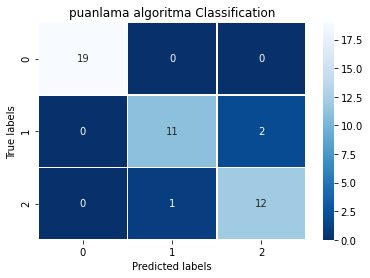

In [12]:
cm = confusion_matrix(y_test,tahmin)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('puanlama algoritma Classification')

Text(0.5, 1.0, 'Lojistic Classification')

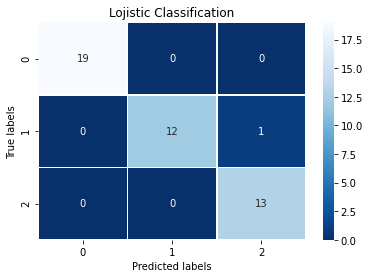

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

LR=LogisticRegression(solver="liblinear",fit_intercept=True)
results_LR = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Lojistic Classification')

Text(0.5, 1.0, 'Decision Tree Classification')

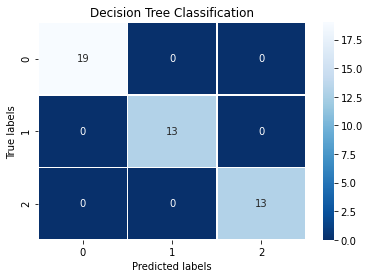

In [14]:
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
BG = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
results_BG = model_selection.cross_val_score(BG, x_train, y_train, cv=kfold)
BG.fit(x_train, y_train)
y_pred_BG = BG.predict(x_test)
cm = confusion_matrix(y_test, y_pred_BG)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Classification')

Text(0.5, 1.0, 'Random Forest Classification')

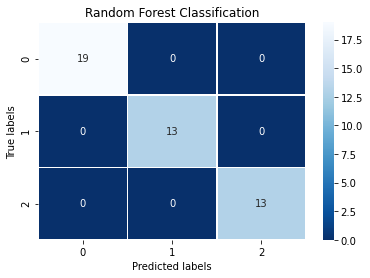

In [15]:
kfold = model_selection.KFold(n_splits=10)
RF = RandomForestClassifier(n_estimators=100, max_features=3)
results_RF = model_selection.cross_val_score(RF, x_train, y_train, cv=kfold)
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)

#Confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Classification')


In [16]:
df=pd.read_csv("heart.csv")
df=df.rename(columns={"age":"yaş","sex":"cinsiyet","trestbps":"tansiyon","chol":"kolestrol","fbs":"A.kanşekeri","restecg":"EKG","thalach":"MaxNabız","exang":"Anjin","oldpeak":"STdep","slope":"STegimi","ca":"florosopi","thal":"thal","target":"KalpHast"})
x=df.loc[:,["yaş","cinsiyet","cp","tansiyon","kolestrol","A.kanşekeri","EKG","MaxNabız","Anjin","STdep","STegimi","florosopi","thal"]]
y=df["KalpHast"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [17]:
tk=fit_predict(x_train,y_train,x_test)

Text(0.5, 1.0, 'puanlama algoritma Classification')

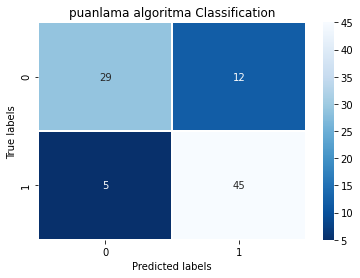

In [18]:
cm = confusion_matrix(y_test,tk)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('puanlama algoritma Classification')

Text(0.5, 1.0, 'Decision Tree Classification')

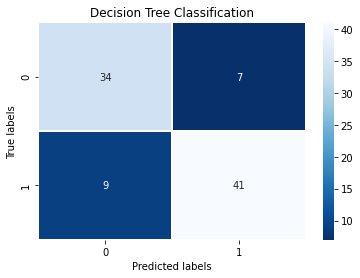

In [19]:
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
BG = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=7)
results_BG = model_selection.cross_val_score(BG, x_train, y_train, cv=kfold)
BG.fit(x_train, y_train)
y_pred_BG = BG.predict(x_test)
cm = confusion_matrix(y_test, y_pred_BG)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Classification')

Text(0.5, 1.0, 'Lojistic Classification')

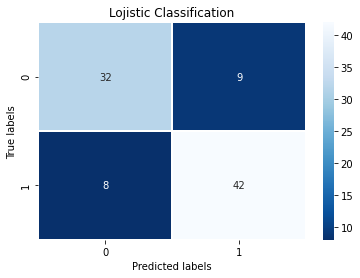

In [20]:

LR=LogisticRegression(solver="liblinear",fit_intercept=True)
results_LR = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Lojistic Classification')

Test accuracy: 0.8241758241758241
Precision:0.8400, Recall:0.8400, F1:0.8400
CV Accuracy 0.8315053763440861


[Text(0, 0.5, 'not-cardiac'), Text(0, 1.5, 'cardiac')]

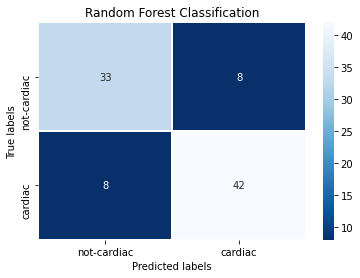

In [21]:
kfold = model_selection.KFold(n_splits=10)
RF = RandomForestClassifier(n_estimators=100, max_features=3)
results_RF = model_selection.cross_val_score(RF, x_train, y_train, cv=kfold)
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)
print('Test accuracy:', RF.score(x_test, y_test))
print('Precision:{:6.4f}, Recall:{:6.4f}, F1:{:6.4f}'.format(precision_score(y_test, y_pred_RF),
recall_score(y_test, y_pred_RF), f1_score(y_test, y_pred_RF)))
CV_scores_RF = cross_val_score(RF, x, y, cv=10)
print('CV Accuracy', statistics.mean(CV_scores_RF))
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_RF)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Classification')
ax.xaxis.set_ticklabels(['not-cardiac', 'cardiac'])
ax.yaxis.set_ticklabels(['not-cardiac', 'cardiac'])